In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Importing the data


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

# Understanding the dataset

In [4]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
X.shape
# y.shape


(48842, 14)

In [6]:
X.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [7]:
y.columns

Index(['income'], dtype='object')

In [8]:
import pandas as pd

dataframe = pd.concat([X, y], axis=1)
print(dataframe.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

# Data Cleaning 

In [9]:
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [10]:
X.duplicated().sum()

53

In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer

def data_cleaning(dataframe):
    # Identify numeric and categorical columns
    numeric_cols = dataframe.select_dtypes(include='number').columns
    categorical_cols = dataframe.select_dtypes(include='object').columns

    # Handling missing values for numeric columns
    if numeric_cols.size > 0:
        # Use median for numeric columns
        median_imputer = SimpleImputer(strategy='median')
        dataframe[numeric_cols] = median_imputer.fit_transform(dataframe[numeric_cols])

    # Handling missing values for categorical columns
    if categorical_cols.size > 0:
        # Use the most frequent value (mode) for categorical columns
        mode_imputer = SimpleImputer(strategy='most_frequent')
        dataframe[categorical_cols] = mode_imputer.fit_transform(dataframe[categorical_cols])

    # Drop rows where critical columns (e.g., 'income') have missing values
    if 'income' in dataframe.columns:
        dataframe.dropna(subset=['income'], inplace=True)
    
    dataframe['income'] = dataframe['income'].str.replace('.', '', regex=False)
    
    # Remove duplicate rows
    dataframe.drop_duplicates(inplace=True)

    

    # Summary of the data after cleaning
    print("Duplicate Rows Remaining: ", dataframe.duplicated().sum())
    print("Missing Values Remaining:\n", dataframe.isnull().sum())
    
    return dataframe

# Example usage
dataframe = data_cleaning(dataframe)
dataframe.head()



Duplicate Rows Remaining:  0
Missing Values Remaining:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# Creation of input output features

In [12]:
features = dataframe.drop(columns='income', axis=1)
target = dataframe['income']

In [13]:
features

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States
48838,64.0,Private,321403.0,HS-grad,9.0,Widowed,Prof-specialty,Other-relative,Black,Male,0.0,0.0,40.0,United-States
48839,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States
48840,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States


In [14]:
target

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48837    <=50K
48838    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48793, dtype: object

In [15]:
features.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
dtype: object

## Conversion of features into numeric values

In [16]:
dataframe['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
target = dataframe['income']
target = encoder.fit_transform(target)
target

array([0, 0, 0, ..., 0, 0, 1])

In [18]:
# One-hot encoding the data using pandas get_dummies

# List of categorical columns
categorical_columns = features.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    features[col] = features[col].astype('category')

features.dtypes

age                float64
workclass         category
fnlwgt             float64
education         category
education-num      float64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country    category
dtype: object

In [19]:
features = pd.get_dummies(features)
features

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50.0,83311.0,13.0,0.0,0.0,13.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38.0,215646.0,9.0,0.0,0.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53.0,234721.0,7.0,0.0,0.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28.0,338409.0,13.0,0.0,0.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,215419.0,13.0,0.0,0.0,36.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,64.0,321403.0,9.0,0.0,0.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,38.0,374983.0,13.0,0.0,0.0,50.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,44.0,83891.0,13.0,5455.0,0.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Scaling of the features

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_minmax = scaler.fit_transform(features)

features_minmax


array([[0.30136986, 0.04413121, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.45205479, 0.04805174, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.28767123, 0.13758131, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.28767123, 0.24537874, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.36986301, 0.04844413, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.24657534, 0.11491866, 0.8       , ..., 1.        , 0.        ,
        0.        ]])

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_standard = scaler.fit_transform(features)

features_standard

array([[ 0.02539913, -1.0618875 ,  1.13664009, ...,  0.32740729,
        -0.04201976, -0.02171639],
       [ 0.82781809, -1.00701946,  1.13664009, ...,  0.32740729,
        -0.04201976, -0.02171639],
       [-0.04754805,  0.24595069, -0.41979549, ...,  0.32740729,
        -0.04201976, -0.02171639],
       ...,
       [-0.04754805,  1.75458035,  1.13664009, ...,  0.32740729,
        -0.04201976, -0.02171639],
       [ 0.39013502, -1.00152792,  1.13664009, ...,  0.32740729,
        -0.04201976, -0.02171639],
       [-0.26638959, -0.07121404,  1.13664009, ...,  0.32740729,
        -0.04201976, -0.02171639]])

In [22]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale_features(features):


    one_hot_columns = features.select_dtypes(include=['bool']).columns.tolist()
    numeric_columns = features.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_columns_ = [col for col in numeric_columns if col not in one_hot_columns]
    
    # Prompt the user for scaling choice
    print("Choose a scaling method:")
    print("Choose carefully based on the model you plan to use. Your one wise decision can change the world and save the time to sleep. :)")
    print("1. MinMaxScaler (scales values between 0 and 1, useful for neural networks and when data is bounded)")
    print("2. StandardScaler (scales values with mean 0 and standard deviation 1, useful for linear models like linear regression, logistic regression, and principal component analysis)")
    
    choice = input("Enter 1 for MinMaxScaler or 2 for StandardScaler: ")

    print("You chose:", choice)
    
    if choice == '1':
        # Apply MinMaxScaler
        scaler = MinMaxScaler()
        scaled_features = scaler.fit_transform(features[numeric_columns_])
        print("MinMaxScaler applied.")
        
    elif choice == '2':
        # Apply StandardScaler
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features[numeric_columns_])
        print("StandardScaler applied.")
        
    else:
        print("Invalid input. Please enter 1 or 2.")
        return None
    
    # Create a DataFrame of scaled features
    scaled_features_dataframe = pd.DataFrame(scaled_features, columns=numeric_columns_)

    # Add the one-hot encoded columns to the scaled features DataFrame
    scaled_features_dataframe = pd.concat([scaled_features_dataframe, features[one_hot_columns].reset_index(drop=True)], axis=1)
    
    return scaled_features_dataframe



scaled_features_df = scale_features(features)

# Now `scaled_features_df` contains the scaled features
print(scaled_features_df.head())


Choose a scaling method:
Choose carefully based on the model you plan to use. Your one wise decision can change the world and save the time to sleep. :)
1. MinMaxScaler (scales values between 0 and 1, useful for neural networks and when data is bounded)
2. StandardScaler (scales values with mean 0 and standard deviation 1, useful for linear models like linear regression, logistic regression, and principal component analysis)
You chose: 1
MinMaxScaler applied.
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.301370  0.044131       0.800000       0.02174           0.0   
1  0.452055  0.048052       0.800000       0.00000           0.0   
2  0.287671  0.137581       0.533333       0.00000           0.0   
3  0.493151  0.150486       0.400000       0.00000           0.0   
4  0.150685  0.220635       0.800000       0.00000           0.0   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0        0.397959        False                  F

In [23]:
features.dtypes

age                               float64
fnlwgt                            float64
education-num                     float64
capital-gain                      float64
capital-loss                      float64
                                   ...   
native-country_Thailand              bool
native-country_Trinadad&Tobago       bool
native-country_United-States         bool
native-country_Vietnam               bool
native-country_Yugoslavia            bool
Length: 108, dtype: object

# Correlation Analysis


In [24]:
# features_df = pd.DataFrame(features_minmax, columns=features.columns)
features_df = scale_features(features)
target_df = pd.DataFrame(target, columns=['income'])

#correlation analysis of features with the target
target_series = target_df['income']
correlation = features_df.corrwith(target_series)
correlation

Choose a scaling method:
Choose carefully based on the model you plan to use. Your one wise decision can change the world and save the time to sleep. :)
1. MinMaxScaler (scales values between 0 and 1, useful for neural networks and when data is bounded)
2. StandardScaler (scales values with mean 0 and standard deviation 1, useful for linear models like linear regression, logistic regression, and principal component analysis)
You chose: 1
MinMaxScaler applied.


age                               0.230171
fnlwgt                           -0.006311
education-num                     0.332782
capital-gain                      0.223050
capital-loss                      0.147548
                                    ...   
native-country_Thailand          -0.004228
native-country_Trinadad&Tobago   -0.009116
native-country_United-States      0.034420
native-country_Vietnam           -0.015559
native-country_Yugoslavia         0.005518
Length: 108, dtype: float64

In [25]:
# correlation matrix of features with the target
correlation_matrix = features_df.corrwith(target_series)
correlation_matrix

age                               0.230171
fnlwgt                           -0.006311
education-num                     0.332782
capital-gain                      0.223050
capital-loss                      0.147548
                                    ...   
native-country_Thailand          -0.004228
native-country_Trinadad&Tobago   -0.009116
native-country_United-States      0.034420
native-country_Vietnam           -0.015559
native-country_Yugoslavia         0.005518
Length: 108, dtype: float64

In [26]:
target


array([0, 0, 0, ..., 0, 0, 1])

In [27]:
target_df['income']

0        0
1        0
2        0
3        0
4        0
        ..
48788    0
48789    0
48790    0
48791    0
48792    1
Name: income, Length: 48793, dtype: int64

In [28]:
# Get absolute values of correlations
abs_correlation = correlation.abs()

# Sort by absolute correlation values in descending order
sorted_features = abs_correlation.sort_values(ascending=False)

# Select the top 20 features
top_10_features = sorted_features.head(10)

print("Top 10 features based on absolute correlation with the target:")
print(top_10_features)

Top 10 features based on absolute correlation with the target:
marital-status_Married-civ-spouse    0.445679
relationship_Husband                 0.403597
education-num                        0.332782
marital-status_Never-married         0.318519
age                                  0.230171
hours-per-week                       0.227652
relationship_Own-child               0.225689
capital-gain                         0.223050
sex_Male                             0.214610
sex_Female                           0.214610
dtype: float64


# Logistic Regression

In [29]:
import numpy as np
from typing import List, Tuple

class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.asarray(z)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_pred)
        return (y_pred > 0.5).astype(int)
    
    def predict_proba(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        probabilities = self.sigmoid(linear_pred)

        return np.column_stack((1 - probabilities, probabilities))
    
    def predict_log_proba(self, X):
        probabilities = self.predict_proba(X)
        log_probabilities = np.log(probabilities)
        return log_probabilities

# Evaluation Metrics


In [42]:

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, confusion_matrix)

def evaluate_model(y_true, y_pred, y_prob):
    #Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    #Metrics
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auroc = roc_auc_score(y_true, y_prob)
    aupr = average_precision_score(y_true, y_prob)


    return {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'F1 Score': f1,
        'AUROC': auroc,
        'AUPR': aupr
    }



from colorama import Fore, Style

def print_metrics(metrics, ensemble_name):
    """
    Prints the evaluation metrics with a colored heading.

    Parameters:
    - metrics (dict): A dictionary where keys are metric names and values are metric values.
    - ensemble_name (str): The name of the ensemble to display as a header.
    """
    # Box drawing characters
    box_horizontal = "─"
    box_vertical = "│"
    box_top_left = "┌"
    box_top_right = "┐"
    box_bottom_left = "└"
    box_bottom_right = "┘"

    # Calculate the width of the box
    max_metric_length = max(len(f"{metric}: {value:.4f} ± {value:.4f}") for metric, value in metrics.items())
    box_width = max_metric_length + 5  # Extra space for padding and vertical lines

    # Create the box
    print(f"{Fore.MAGENTA}{box_top_left}{box_horizontal * (box_width - 2)}{box_top_right}{Style.RESET_ALL}")

    # Print the header
    print(f"{Fore.GREEN}{Style.BRIGHT}{box_vertical} Evaluation metrics for the {ensemble_name} ensemble: {box_vertical}{Style.RESET_ALL}")

    print(f"{Fore.MAGENTA}{box_top_left}{box_horizontal * (box_width - 2)}{box_top_right}{Style.RESET_ALL}")

    # Print each metric in a formatted way
    for metric, value in metrics.items():
        print(f"{Fore.GREEN}{box_vertical} {metric}: {value:.4f}  \t\t {box_vertical}{Style.RESET_ALL}")

    # Bottom of the box
    print(f"{Fore.MAGENTA}{box_bottom_left}{box_horizontal * (box_width - 2)}{box_bottom_right}{Style.RESET_ALL}")






def print_LR_metrics(metrics_df):
    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    # ANSI escape codes for pink and box drawing
    pink_color = "\033[95m"
    reset_color = "\033[0m"
    green_color = "\033[92m"
    box_horizontal = "─"
    box_vertical = "│"
    box_top_left = "┌"
    box_top_right = "┐"
    box_bottom_left = "└"
    box_bottom_right = "┘"

    # Create the box
    box_width = max(len(metric) for metric in avg_metrics.index) + 30  # Adjust for metrics label length
    print(f"{pink_color}{box_top_left}{box_horizontal * (box_width - 2)}{box_top_right}{reset_color}")

    print(f"{green_color}{box_vertical} Evaluation metrics for the 9 Bagging LR learners (average ± stdev): {box_vertical}{reset_color}")

    print(f"{pink_color}{box_top_left}{box_horizontal * (box_width - 2)}{box_top_right}{reset_color}")

    for metric in avg_metrics.index:
        print(f"{green_color}{box_vertical} {metric}: {avg_metrics[metric]:.4f} ± {std_metrics[metric]:.4f} \t\t {box_vertical}{reset_color}")

    print(f"{pink_color}{box_bottom_left}{box_horizontal * (box_width - 2)}{box_bottom_right}{reset_color}")




# Validating the pipeline


In [31]:
import numpy as np
# from sklearn.linear_model import LogisticRegression
# from LogisticRegression import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def validatePipeline(features_df, target_df):
    # considering all the columns as features
    X = features_df.to_numpy()  # Convert the feature DataFrame to a NumPy array
    Y = target_df['income'].to_numpy()  # Convert the target column to a NumPy array

    

    # Step 1: Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Step 2: Initialize the Logistic Regression Classifier
    clf = LogisticRegression()

    # Convert to float64 to avoid type issues
    X_train = X_train.astype(np.float64)
    X_test = X_test.astype(np.float64)

    # Step 3: Train the classifier on the training data
    clf.fit(X_train, Y_train)

    # Step 4: Make predictions on the test data
    y_pred = clf.predict(X_test)

    y_prob = clf.predict_proba(X_test)

    # Step 5: Evaluate the classifier's performance
    accuracy = accuracy_score(Y_test, y_pred)

    print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")

    print(Y_test.shape, y_pred.shape, y_prob.shape)

    # Evaluate the model
    metrics_lr = evaluate_model(Y_test, y_pred, y_prob[:, 1])

    print("Evaluation metrics for the Logistic Regression model:")
    print(pd.DataFrame([metrics_lr]))


# `scaled_features_df` is the preprocessed feature DataFrame and `target_df` contains the target values
validatePipeline(scaled_features_df, target_df)


Accuracy of Logistic Regression classifier: 0.78
(9759,) (9759,) (9759, 2)
Evaluation metrics for the Logistic Regression model:
   Accuracy  Sensitivity  Specificity  Precision  F1 Score     AUROC      AUPR
0  0.775592     0.150502     0.978553   0.694981  0.247423  0.832072  0.576279


In [32]:
import numpy as np
# from sklearn.linear_model import LogisticRegression
# from LogisticRegression import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, confusion_matrix)

def validatePipeline(features_df, target_df, top_10_features):
    # considering only the top 20 features according to the correlation analysis
    X = features_df[top_10_features.index].to_numpy()  # Convert the feature DataFrame to a NumPy array
    Y = target_df['income'].to_numpy()  # Convert the target column to a NumPy array

    # Step 1: Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Convert to float64 to avoid type issues
    X_train = X_train.astype(np.float64)
    X_test = X_test.astype(np.float64)

    # Step 2: Initialize the Logistic Regression Classifier
    clf = LogisticRegression()

    # Step 3: Train the classifier on the training data
    clf.fit(X_train, Y_train)

    # Step 4: Make predictions on the test data
    y_pred = clf.predict(X_test)

    y_prob = clf.predict_proba(X_test)

    # Step 5: Evaluate the classifier's performance
    accuracy = accuracy_score(Y_test, y_pred)

    print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")

    # Evaluate the model
    metrics_lr = evaluate_model(Y_test, y_pred, y_prob[:, 1])

    print("Evaluation metrics for the Logistic Regression model:")
    print(pd.DataFrame([metrics_lr]))



validatePipeline(features_df, target_df, top_10_features)

Accuracy of Logistic Regression classifier: 0.75
Evaluation metrics for the Logistic Regression model:
   Accuracy  Sensitivity  Specificity  Precision  F1 Score     AUROC     AUPR
0  0.754893          0.0          1.0        0.0       0.0  0.714342  0.33647


/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Bagging Stacking


In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier


class BaggingClassifier:
    def __init__(self, base_estimator, n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.estimators = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        for _ in range(self.n_estimators):
            estimator = self.base_estimator()
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X[indices], y[indices]
            estimator.fit(X_sample, y_sample)
            self.estimators.append(estimator)

    def predict(self, X):
        predictions = np.array([est.predict(X) for est in self.estimators])
        return np.round(np.mean(predictions, axis=0)).astype(int)
    
    def predict_proba(self, X):
        probas = np.array([est.predict_proba(X) for est in self.estimators])
        return np.mean(probas, axis=0)
    


class StackingClassifier:
    def __init__(self, base_learners, meta_classifier):
        self.base_learners = base_learners
        self.meta_classifier = meta_classifier

    def fit(self, X, y):
        # Generate predictions from base learners
        base_preds = np.column_stack([base.predict_proba(X)[:, 1] for base in self.base_learners])
        # Fit meta-classifier on base learner predictions
        self.meta_classifier.fit(base_preds, y)

    def predict(self, X):
        base_preds = np.column_stack([base.predict_proba(X)[:, 1] for base in self.base_learners])
        return self.meta_classifier.predict(base_preds)

    def predict_proba(self, X):
        base_preds = np.column_stack([base.predict_proba(X)[:, 1] for base in self.base_learners])
        return self.meta_classifier.predict_proba(base_preds)

# Majority Voting Ensemble
class MajorityVotingClassifier:
    def __init__(self, base_learners):
        self.base_learners = base_learners
    
    def fit(self, X, y):
        for learner in self.base_learners:
            learner.fit(X, y)
    
    def predict(self, X):
        predictions = np.array([learner.predict(X) for learner in self.base_learners])
        return np.round(np.mean(predictions, axis=0)).astype(int)
    
    def predict_proba(self, X):
        probas = np.array([learner.predict_proba(X) for learner in self.base_learners])
        return np.mean(probas, axis=0)
    


def validateEnsemble(features_df, target_df, top_10_features):
    # Convert features and target to NumPy arrays
    X = features_df[top_10_features.index].to_numpy()
    y = target_df['income'].to_numpy()

    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert to float64 to avoid type issues
    X_train = X_train.astype(np.float64)
    X_test = X_test.astype(np.float64)

    # Step 2: Train bagging models with Logistic Regression as base learners
    base_learner = LogisticRegression
    bagging_ensemble = BaggingClassifier(base_estimator=base_learner, n_estimators=9)
    bagging_ensemble.fit(X_train, y_train)


    #Evaluate each of the 9 bagging learners
    metrics_list = []
    for i, estimator in enumerate(bagging_ensemble.estimators):
        y_pred = estimator.predict(X_test)
        y_prob = estimator.predict_proba(X_test)[: ,1]
        metrics = evaluate_model(y_test, y_pred, y_prob)
        metrics_list.append(metrics)
        # print(f"Metrics for base learner {i+1}:")
        # print(pd.DataFrame([metrics]))
    
    
    metrics_df = pd.DataFrame(metrics_list)

    print_LR_metrics(metrics_df)

    # Step 3: Train stacking ensemble with Logistic Regression as meta-learner
    meta_classifier = LogisticRegression()
    stacking_ensemble = StackingClassifier(base_learners=bagging_ensemble.estimators, meta_classifier=meta_classifier)
    stacking_ensemble.fit(X_train, y_train)

    # Step 4: Train majority voting ensemble
    voting_ensemble = MajorityVotingClassifier(base_learners=bagging_ensemble.estimators)
    voting_ensemble.fit(X_train, y_train)

    # Step 5: Make predictions and calculate probabilities
    y_pred_bagging = bagging_ensemble.predict(X_test)
    y_prob_bagging = bagging_ensemble.predict_proba(X_test)

    y_pred_stacking = stacking_ensemble.predict(X_test)
    y_prob_stacking = stacking_ensemble.predict_proba(X_test)

    y_pred_voting = voting_ensemble.predict(X_test)
    # y_prob_voting = voting_ensemble.predict_proba(X_test)

    # Step 6: Evaluate the models
    metrics_bagging = evaluate_model(y_test, y_pred_bagging, y_prob_bagging[:, 1])
    metrics_stacking = evaluate_model(y_test, y_pred_stacking, y_prob_stacking[:, 1])
    metrics_voting = evaluate_model(y_test, y_pred_voting, y_pred_voting)  # Majority voting has no probas

    # Step 7: Compare the models
    print("Evaluation metrics for the Bagging ensemble:")
    print(pd.DataFrame([metrics_bagging]))
    print_metrics(metrics_bagging, "Bagging")

    print("Evaluation metrics for the Stacking ensemble:")
    print(pd.DataFrame([metrics_stacking]))
    print_metrics(metrics_stacking, "Stacking")

    print("Evaluation metrics for the Majority Voting ensemble:")
    print(pd.DataFrame([metrics_voting]))
    print_metrics(metrics_voting, "Majority Voting")


validateEnsemble(features_df, target_df, top_10_features)

/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedM

┌───────────────────────────────────────┐
│ Evaluation metrics for the 9 Bagging LR learners (average ± stdev): │
┌───────────────────────────────────────┐
│ Accuracy: 0.7549 ± 0.0000 		 │
│ Sensitivity: 0.0000 ± 0.0000 		 │
│ Specificity: 1.0000 ± 0.0000 		 │
│ Precision: 0.0000 ± 0.0000 		 │
│ F1 Score: 0.0000 ± 0.0000 		 │
│ AUROC: 0.7144 ± 0.0009 		 │
│ AUPR: 0.3365 ± 0.0006 		 │
└───────────────────────────────────────┘
Evaluation metrics for the Bagging ensemble:
   Accuracy  Sensitivity  Specificity  Precision  F1 Score     AUROC     AUPR
0  0.754893          0.0          1.0        0.0       0.0  0.714342  0.33647
┌───────────────────────────────┐
│ Evaluation metrics for the Bagging ensemble: │
┌───────────────────────────────┐
│ Accuracy: 0.7549  		 │
│ Sensitivity: 0.0000  		 │
│ Specificity: 1.0000  		 │
│ Precision: 0.0000  		 │
│ F1 Score: 0.0000  		 │
│ AUROC: 0.7143  		 │
│ AUPR: 0.3365  		 │
└───────────────────────────────┘
Evaluation metrics for the Stacking ensemble

/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Violin Graph

/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedM

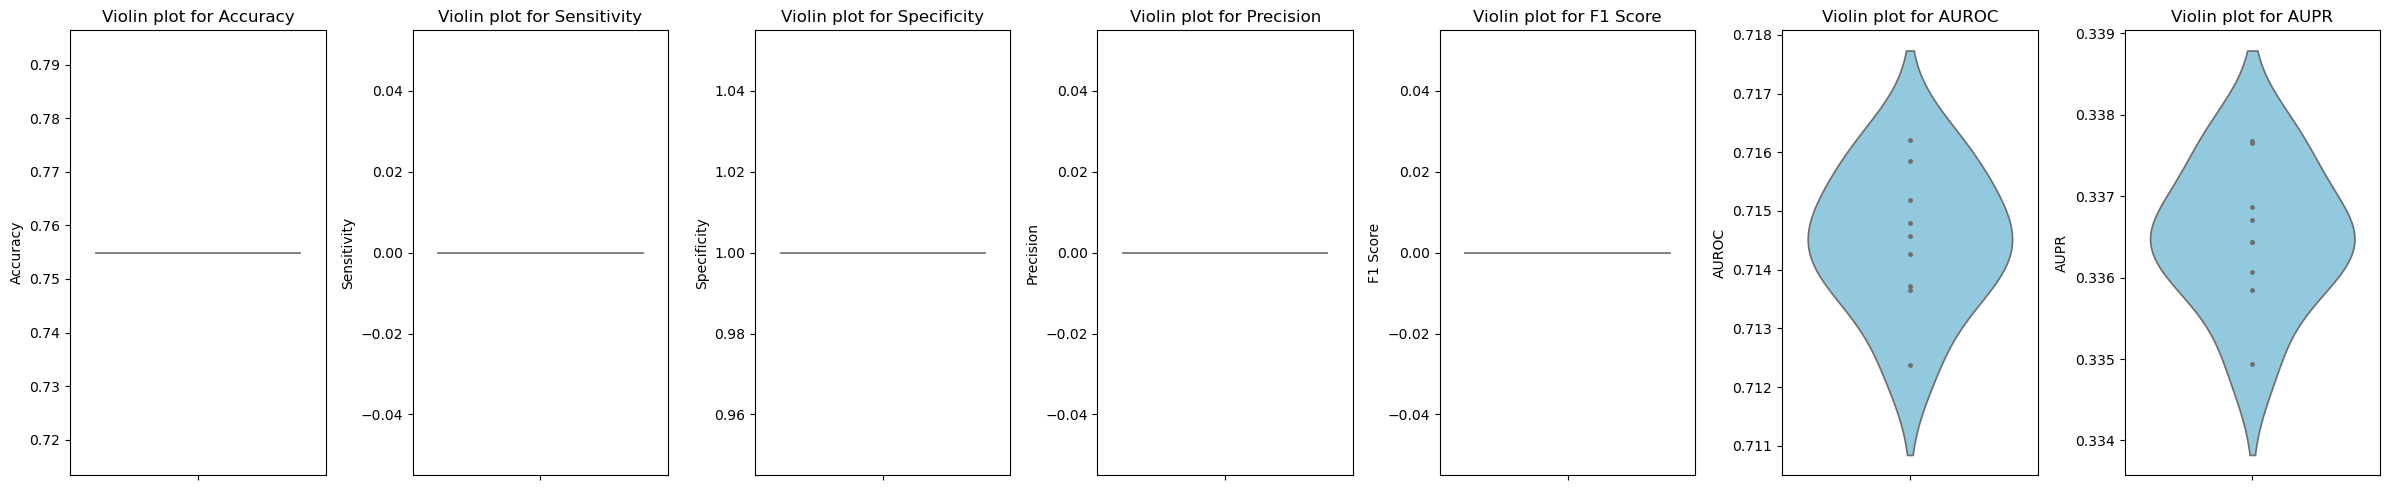

Evaluation metrics for the Bagging ensemble:
   Accuracy  Sensitivity  Specificity  Precision  F1 Score     AUROC     AUPR
0  0.754893          0.0          1.0        0.0       0.0  0.714541  0.33656


/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


def validateEnsembleViolin(features_df, target_df, top_10_features):
    # Convert features and target to NumPy arrays
    X = features_df[top_10_features.index].to_numpy()
    y = target_df['income'].to_numpy()

    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert to float64 to avoid type issues
    X_train = X_train.astype(np.float64)
    X_test = X_test.astype(np.float64)

    # Step 2: Train bagging models with Logistic Regression as base learners
    base_learner = LogisticRegression
    bagging_ensemble = BaggingClassifier(base_estimator=base_learner, n_estimators=9)
    bagging_ensemble.fit(X_train, y_train)


    metrics_list = []

    for est in bagging_ensemble.estimators:
        y_pred = est.predict(X_test)
        y_prob = est.predict_proba(X_test)
        metrics = evaluate_model(y_test, y_pred, y_prob[:, 1])
        metrics_list.append(metrics)


    metrics_df = pd.DataFrame(metrics_list)

    plt.figure(figsize=(24, 5))

    for i, metric in enumerate(metrics_df.columns, 1):
        plt.subplot(1, 7, i)
        sns.violinplot(data=metrics_df[metric], inner="point", color="skyblue")
        plt.title(f"Violin plot for {metric}")
        plt.ylabel(metric)

    plt.tight_layout()
    plt.show()


    # Step 5: Make predictions and calculate probabilities
    y_pred_bagging = bagging_ensemble.predict(X_test)
    y_prob_bagging = bagging_ensemble.predict_proba(X_test)

    # # Step 6: Evaluate the models
    metrics_bagging = evaluate_model(y_test, y_pred_bagging, y_prob_bagging[:, 1])
    # metrics_stacking = evaluate_model(y_test, y_pred_stacking, y_prob_stacking[:, 1])
    # metrics_voting = evaluate_model(y_test, y_pred_voting, y_pred_voting)  # Majority voting has no probas

    # Step 7: Compare the models
    print("Evaluation metrics for the Bagging ensemble:")
    print(pd.DataFrame([metrics_bagging]))



validateEnsembleViolin(features_df, target_df,top_10_features)

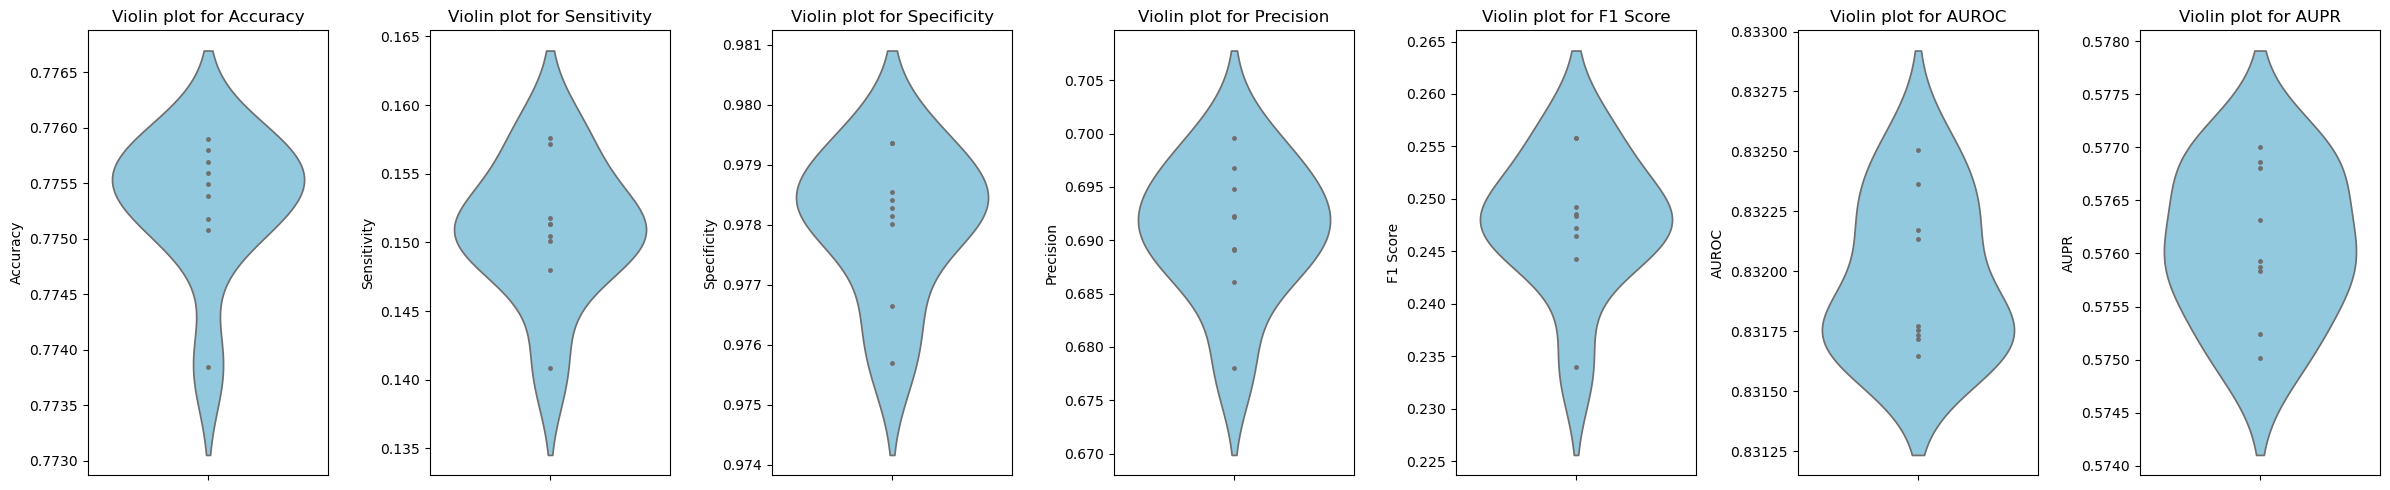

Evaluation metrics for the Bagging ensemble:
   Accuracy  Sensitivity  Specificity  Precision  F1 Score     AUROC      AUPR
0  0.775592      0.15092     0.978417   0.694231   0.24794  0.832063  0.576088


In [36]:
def validateEnsembleViolin(features_df, target_df):
    # Convert features and target to NumPy arrays
    X = features_df.to_numpy()
    y = target_df['income'].to_numpy()

    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert to float64 to avoid type issues
    X_train = X_train.astype(np.float64)
    X_test = X_test.astype(np.float64)

    # Step 2: Train bagging models with Logistic Regression as base learners
    base_learner = LogisticRegression
    bagging_ensemble = BaggingClassifier(base_estimator=base_learner, n_estimators=9)
    bagging_ensemble.fit(X_train, y_train)


    metrics_list = []

    for est in bagging_ensemble.estimators:
        y_pred = est.predict(X_test)
        y_prob = est.predict_proba(X_test)
        metrics = evaluate_model(y_test, y_pred, y_prob[:, 1])
        metrics_list.append(metrics)


    metrics_df = pd.DataFrame(metrics_list)

    plt.figure(figsize=(24, 5))

    for i, metric in enumerate(metrics_df.columns, 1):
        plt.subplot(1, 7, i)
        sns.violinplot(data=metrics_df[metric], inner="point", color="skyblue")
        plt.title(f"Violin plot for {metric}")
        plt.ylabel(metric)

    plt.tight_layout()
    plt.show()


    # Step 5: Make predictions and calculate probabilities
    y_pred_bagging = bagging_ensemble.predict(X_test)
    y_prob_bagging = bagging_ensemble.predict_proba(X_test)

    # # Step 6: Evaluate the models
    metrics_bagging = evaluate_model(y_test, y_pred_bagging, y_prob_bagging[:, 1])
    # metrics_stacking = evaluate_model(y_test, y_pred_stacking, y_prob_stacking[:, 1])
    # metrics_voting = evaluate_model(y_test, y_pred_voting, y_pred_voting)  # Majority voting has no probas

    # Step 7: Compare the models
    print("Evaluation metrics for the Bagging ensemble:")
    print(pd.DataFrame([metrics_bagging]))



validateEnsembleViolin(features_df, target_df)

In [44]:
def validateEnsemble(features_df, target_df):
    # Convert features and target to NumPy arrays
    X = features_df.to_numpy()
    y = target_df['income'].to_numpy()

    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert to float64 to avoid type issues
    X_train = X_train.astype(np.float64)
    X_test = X_test.astype(np.float64)

    # Step 2: Train bagging models with Logistic Regression as base learners
    base_learner = LogisticRegression
    bagging_ensemble = BaggingClassifier(base_estimator=base_learner, n_estimators=9)
    bagging_ensemble.fit(X_train, y_train)

    #Evaluate each of the 9 bagging learners
    metrics_list = []
    for i, estimator in enumerate(bagging_ensemble.estimators):
        y_pred = estimator.predict(X_test)
        y_prob = estimator.predict_proba(X_test)[: ,1]
        metrics = evaluate_model(y_test, y_pred, y_prob)
        metrics_list.append(metrics)
        # print(f"Metrics for base learner {i+1}:")
        # print(pd.DataFrame([metrics]))
    
    
    metrics_df = pd.DataFrame(metrics_list)

    print_LR_metrics(metrics_df)

    # Step 3: Train stacking ensemble with Logistic Regression as meta-learner
    meta_classifier = LogisticRegression()
    stacking_ensemble = StackingClassifier(base_learners=bagging_ensemble.estimators, meta_classifier=meta_classifier)
    stacking_ensemble.fit(X_train, y_train)

    # Step 4: Train majority voting ensemble
    voting_ensemble = MajorityVotingClassifier(base_learners=bagging_ensemble.estimators)
    voting_ensemble.fit(X_train, y_train)

    # Step 5: Make predictions and calculate probabilities
    y_pred_bagging = bagging_ensemble.predict(X_test)
    y_prob_bagging = bagging_ensemble.predict_proba(X_test)

    y_pred_stacking = stacking_ensemble.predict(X_test)
    y_prob_stacking = stacking_ensemble.predict_proba(X_test)

    y_pred_voting = voting_ensemble.predict(X_test)
    # y_prob_voting = voting_ensemble.predict_proba(X_test)

    # Step 6: Evaluate the models
    metrics_bagging = evaluate_model(y_test, y_pred_bagging, y_prob_bagging[:, 1])
    metrics_stacking = evaluate_model(y_test, y_pred_stacking, y_prob_stacking[:, 1])
    metrics_voting = evaluate_model(y_test, y_pred_voting, y_pred_voting)  # Majority voting has no probas

    # Step 7: Compare the models
    print("Evaluation metrics for the Bagging ensemble:")
    print(pd.DataFrame([metrics_bagging]))
    print_metrics(metrics_bagging, "Bagging")

    print("Evaluation metrics for the Stacking ensemble:")
    print(pd.DataFrame([metrics_stacking]))
    print_metrics(metrics_stacking, "Stacking")

    print("Evaluation metrics for the Majority Voting ensemble:")
    print(pd.DataFrame([metrics_voting]))
    print_metrics(metrics_voting, "Majority Voting")


validateEnsemble(features_df, target_df)

┌───────────────────────────────────────┐
│ Evaluation metrics for the 9 Bagging LR learners (average ± stdev): │
┌───────────────────────────────────────┐
│ Accuracy: 0.7748 ± 0.0011 		 │
│ Sensitivity: 0.1480 ± 0.0095 		 │
│ Specificity: 0.9783 ± 0.0019 		 │
│ Precision: 0.6890 ± 0.0068 		 │
│ F1 Score: 0.2435 ± 0.0126 		 │
│ AUROC: 0.8320 ± 0.0004 		 │
│ AUPR: 0.5758 ± 0.0013 		 │
└───────────────────────────────────────┘
Evaluation metrics for the Bagging ensemble:
   Accuracy  Sensitivity  Specificity  Precision  F1 Score     AUROC      AUPR
0  0.775592     0.150502     0.978553   0.694981  0.247423  0.832072  0.576279
┌───────────────────────────────┐
│ Evaluation metrics for the Bagging ensemble: │
┌───────────────────────────────┐
│ Accuracy: 0.7756  		 │
│ Sensitivity: 0.1505  		 │
│ Specificity: 0.9786  		 │
│ Precision: 0.6950  		 │
│ F1 Score: 0.2474  		 │
│ AUROC: 0.8321  		 │
│ AUPR: 0.5763  		 │
└───────────────────────────────┘
Evaluation metrics for the Stacking ensemb

/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
